Machine Learning Coursework on Loan Prediction

LOAD NECESSARY PYTHON LIBRARIES

In [134]:
import numpy as np
import pandas as pd # data processing
import warnings # warning filter

#plotting libraries
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

#relevant ML libraries
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


LOAD OUR LOAN TRAINING AND TEST DATASET

In [135]:
train = pd.read_csv("train_u6lujuX_CVtuZ9i.csv")
test = pd.read_csv("test_Y3wMUE5_7gLdaTN.csv")
# ss = pd.read_csv("sample_submission.csv")

TO DISPLAY TRAIN DATA SIZE

In [136]:
train.shape

(614, 13)

TO DISPLAY TEST DATA SIZE

In [137]:
test.shape

(367, 12)

TO SHOW OUR TEST DATA

In [138]:
test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


TO DO A DATA PREPROCESSING - TO DROP THE UNWANTED COLUMN (LOAN ID)

In [139]:
data = pd.concat([train, test])
data.drop("Loan_ID", axis=1, inplace=True)
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
362,Male,Yes,3+,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban,NaN
363,Male,Yes,0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban,NaN
364,Male,No,0,Graduate,No,3250,1993.0,126.0,360.0,NaN,Semiurban,NaN
365,Male,Yes,0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,NaN


TO IDENTIFY MISSING VALUES

In [140]:
data.isnull().sum()

Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

INPUT THE MISSING VALUES

In [141]:
for i in [data]:
    i["Gender"] = i["Gender"].fillna(data.Gender.dropna().mode()[0])
    i["Married"] = i["Married"].fillna(data.Married.dropna().mode()[0])
    i["Education"] = i["Education"].fillna(data.Education.dropna().mode()[0])
    i["Self_Employed"] = i["Self_Employed"].fillna(data.Self_Employed.dropna().mode()[0])
    i["Credit_History"] = i["Credit_History"].fillna(data.Credit_History.dropna().mode()[0])
    i["Credit_History"] = i["Property_Area"].fillna(data.Property_Area.dropna().mode()[0])
    i["Credit_History"] = i["Dependents"].fillna(data.Dependents.dropna().mode()[0])


from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.ensemble import RandomForestRegressor
data1 = data.loc[:, ['LoanAmount', 'Loan_Amount_Term']]

imp = IterativeImputer(RandomForestRegressor(), max_iter=10, random_state=0)
data1 = pd.DataFrame(imp.fit_transform(data1), columns=data1.columns)

for i in [data]:
    i["Gender"] = i["Gender"].map({"Male":0,"Female":1}).astype(int)
    i["Married"] = i["Married"].map({"No":0,"Yes":1}).astype(int)
    i["Education"] = i["Education"].map({"Not Graduate":0,"Graduate":1}).astype(int)
    i["Self_Employed"] = i["Self_Employed"].map({"No":0,"Yes":1}).astype(int)
    i["Credit_History"] = i["Credit_History"].map({"0":0,"1":1})

for i in [data]:
    i["Property_Area"] = i["Property_Area"].map({"Urban":0,"Rural":1,"Semiurban":2})
    i["Dependents"] = i["Dependents"].map({"0":0,"1":1,"2":2,"3+":3})


C:\Users\D'NIKE\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [142]:
new_train = data.iloc[:614]
new_test = data.iloc[614:]

pd.set_option('mode.chained_assignment', None)

new_train["Loan_Status"] = new_train["Loan_Status"].map({"N":0,"Y":1}).astype(int)

UNIVARIATE ANALYSIS

C:\Users\D'NIKE\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\D'NIKE\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\D'NIKE\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.

<AxesSubplot:xlabel='Dependents', ylabel='count'>

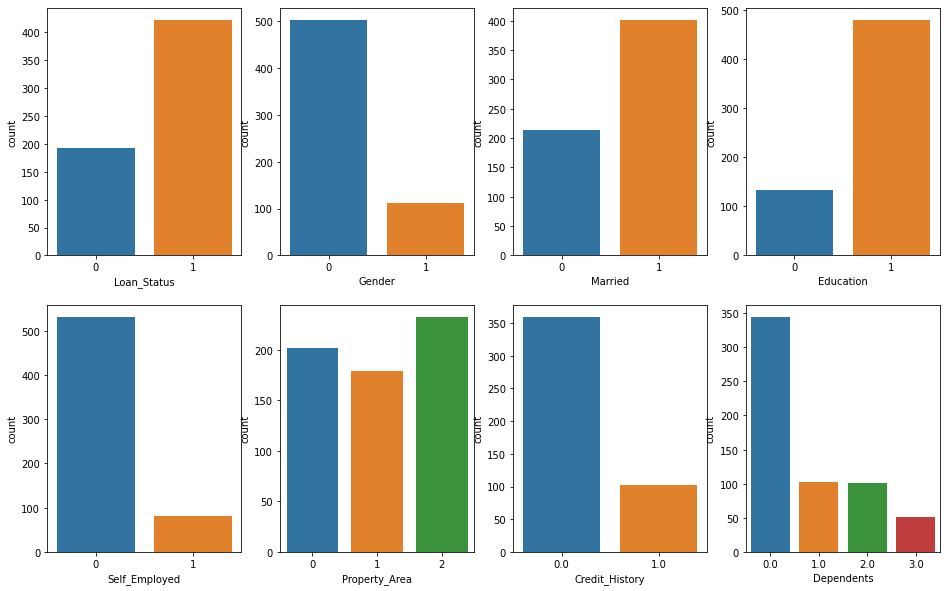

In [143]:
fig,ax = plt.subplots(2,4,figsize=(16,10))
sns.countplot('Loan_Status', data=new_train,ax=ax[0][0])
sns.countplot('Gender', data=new_train,ax=ax[0][1])
sns.countplot('Married', data=new_train,ax=ax[0][2])
sns.countplot('Education', data=new_train,ax=ax[0][3])
sns.countplot('Self_Employed', data=new_train,ax=ax[1][0])
sns.countplot('Property_Area', data=new_train,ax=ax[1][1])
sns.countplot('Credit_History', data=new_train,ax=ax[1][2])
sns.countplot('Dependents', data=new_train,ax=ax[1][3])

BIVARIATE ANALYSIS

<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

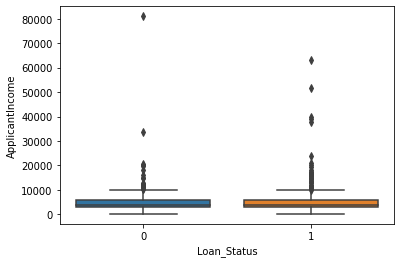

In [150]:
sns.boxplot(x='Loan_Status',y='ApplicantIncome',data=new_train)

<AxesSubplot:xlabel='Loan_Status', ylabel='CoapplicantIncome'>

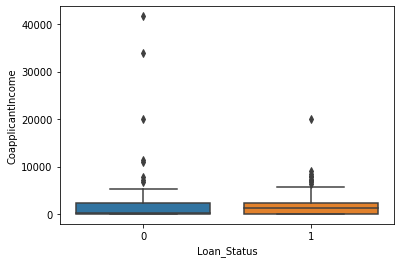

In [151]:
sns.boxplot(x='Loan_Status',y='CoapplicantIncome',data=new_train)

<AxesSubplot:xlabel='Gender', ylabel='LoanAmount'>

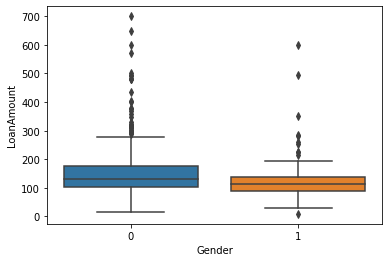

In [149]:
sns.boxplot(x='Gender',y='LoanAmount',data=new_train)